In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px


In [2]:
auto_sales = pd.read_csv("Auto Sales data.csv")

In [3]:
auto_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [4]:
auto_sales['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64

In [5]:
auto_sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
auto_sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [8]:
auto_sales.describe(include='object')

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,246,6,7,109,89,88,89,71,73,19,76,72,3
top,14/11/2018,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,38,2541,949,51,259,259,259,304,259,928,259,259,1349


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Motorcycles'),
  Text(1, 0, 'Classic Cars'),
  Text(2, 0, 'Trucks and Buses'),
  Text(3, 0, 'Vintage Cars'),
  Text(4, 0, 'Planes'),
  Text(5, 0, 'Ships'),
  Text(6, 0, 'Trains')])

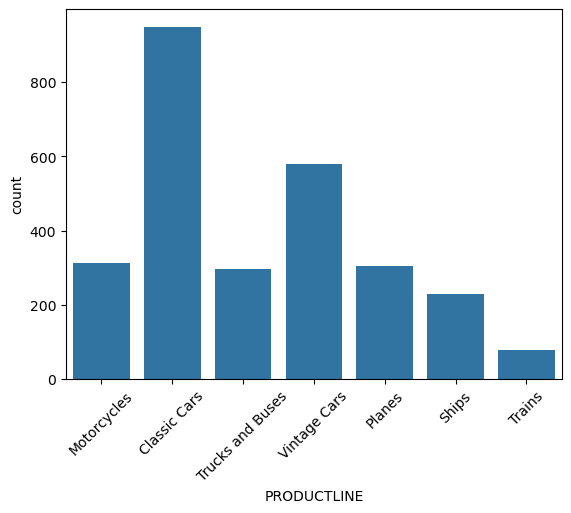

In [9]:
sns.countplot(x=auto_sales['PRODUCTLINE'])
plt.xticks(rotation= 45)


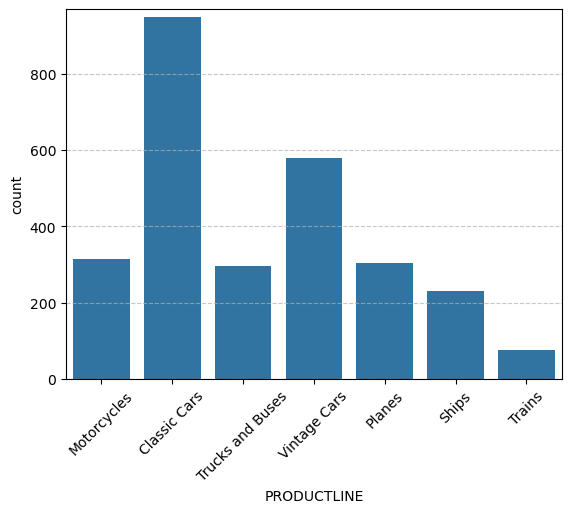

In [10]:
# Plot
sns.countplot(x=auto_sales['PRODUCTLINE'])
plt.xticks(rotation=45)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Increase the scale of the y-axis if needed
max_count = auto_sales['PRODUCTLINE'].value_counts().max()
plt.ylim(0, max_count + 20)  # Adjust the 10 based on how much extra space you want

# Display the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Motorcycles'),
  Text(1, 0, 'Classic Cars'),
  Text(2, 0, 'Trucks and Buses'),
  Text(3, 0, 'Vintage Cars'),
  Text(4, 0, 'Planes'),
  Text(5, 0, 'Ships'),
  Text(6, 0, 'Trains')])

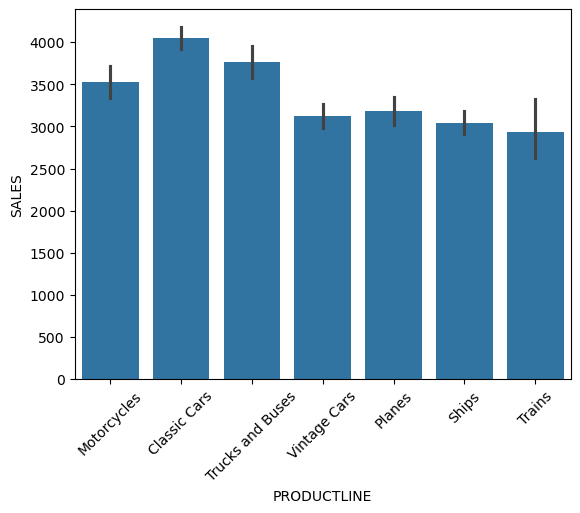

In [11]:
sns.barplot(x=auto_sales['PRODUCTLINE'], y = auto_sales['SALES'])
plt.xticks(rotation= 45)


In [12]:
auto_sales.columns = auto_sales.columns.str.lower()

In [13]:
auto_sales

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,productcode,customername,phone,addressline1,city,postalcode,country,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [14]:
salesauto = auto_sales.groupby('productline')['sales'].sum()
salesauto

productline
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: sales, dtype: float64

([<matplotlib.patches.Wedge at 0x26d7d7e9820>,
 [Text(-1.0392612202190696, 0.3604665256979774, 'Classic Cars'),
  Text(-0.3382181537970261, -1.046713179644802, 'Motorcycles'),
  Text(0.382003051045742, -1.0315394655522125, 'Planes'),
  Text(0.8561576971741057, -0.690647520497636, 'Ships'),
  Text(1.021264361205506, -0.4086797089794286, 'Trains'),
  Text(1.0986277656664276, 0.0549275204864862, 'Trucks and Buses'),
  Text(0.6042318812879044, 0.9191865064475653, 'Vintage Cars')],
 [Text(-0.5668697564831289, 0.19661810492616946, '39.37%'),
  Text(-0.1844826293438324, -0.5709344616244374, '11.31%'),
  Text(0.2083653005704047, -0.5626578903012068, '9.93%'),
  Text(0.4669951075495122, -0.37671682936234685, '7.17%'),
  Text(0.5570532879302759, -0.22291620489787015, '2.32%'),
  Text(0.599251508545324, 0.02996046571990156, '11.39%'),
  Text(0.3295810261570387, 0.5013744580623083, '18.51%')])

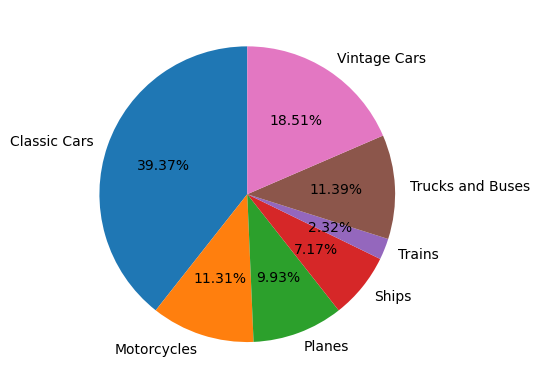

In [15]:
plt.pie(salesauto, labels=salesauto.index ,autopct = '%.2f%%', startangle=90)

In [16]:
# From pie chart analysis it is clear that classic cars are sold the most, while the sales of trains are the least

In [17]:
# analysing the sales of different products in different years

In [18]:
auto_sales['orderdate'] = pd.to_datetime(auto_sales['orderdate'])
auto_sales['year']= auto_sales['orderdate'].dt.year
auto_sales['year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2742    2019
2743    2020
2744    2020
2745    2020
2746    2020
Name: year, Length: 2747, dtype: int32

In [19]:
yearsales = auto_sales.pivot_table(index='productline',columns='year', values='sales', aggfunc='mean')

In [20]:
yearsales

year,2018,2019,2020
productline,,,
Classic Cars,4066.776572,3986.491295,4187.437436
Motorcycles,3384.828901,3417.958720,4050.819483
Planes,3203.030588,3125.733648,3334.569500
Ships,3022.482593,2970.731150,3320.153056
Trains,2600.081786,3149.293243,3076.444167
Trucks and Buses,3822.090273,3758.488777,3667.376522
Vintage Cars,2922.495561,3190.198917,3338.958660


<Axes: xlabel='year', ylabel='productline'>

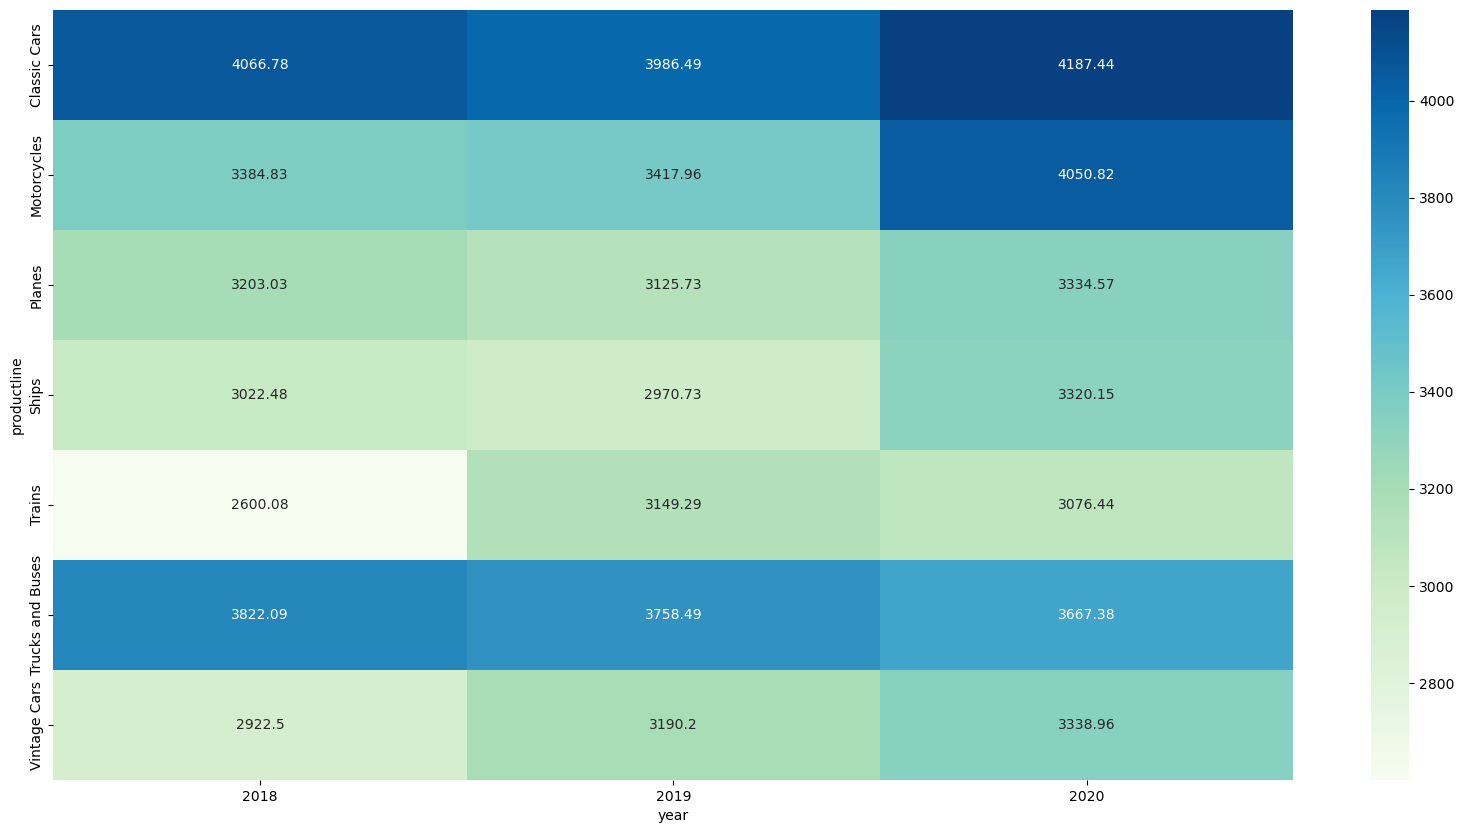

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(yearsales,cmap='GnBu', annot=True, fmt='g')

<Axes: xlabel='year', ylabel='productline'>

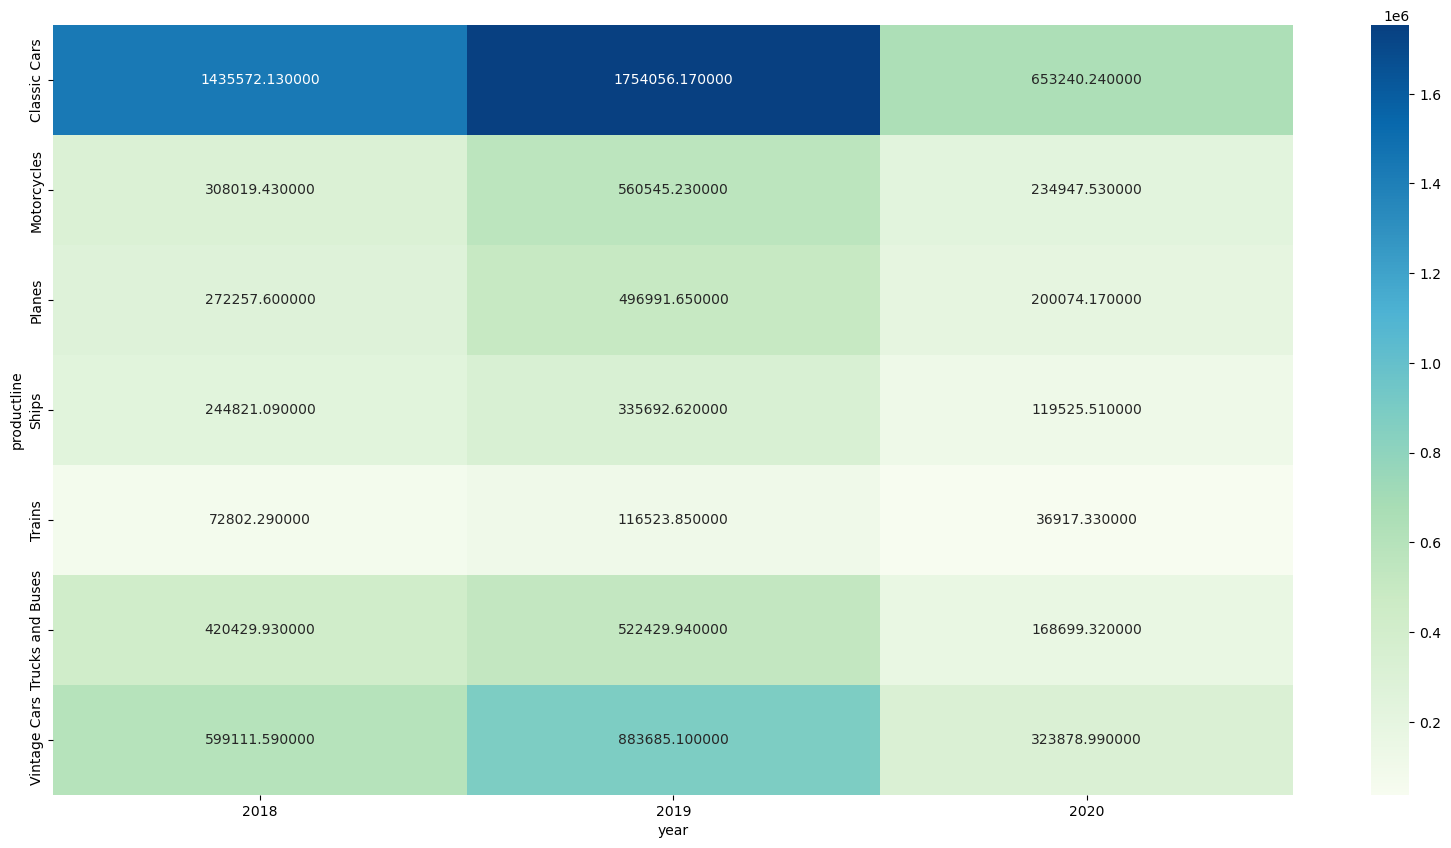

In [22]:
yearsales = auto_sales.pivot_table(index='productline',columns='year', values='sales', aggfunc='sum')
plt.figure(figsize=(20,10))
sns.heatmap(yearsales,cmap='GnBu', annot=True, fmt='f')

### Analysing the heatmap, it can be seen that the sales has been maximum for classic-cars among all the productline
### It is also noteworthy that the sales has been least in year 2020 for every product and 2019 has been the year of maximum sales

In [24]:
# Extract year, month, week, and quarter from ORDERDATE

auto_sales['month'] = auto_sales['orderdate'].dt.month
auto_sales['week'] = auto_sales['orderdate'].dt.isocalendar().week
auto_sales['quarter'] = auto_sales['orderdate'].dt.quarter

In [25]:
#analysing monthly sales for year 2018
monthyearsales = auto_sales[auto_sales['year']==2018].pivot_table(index='productline',columns='month', values='sales', aggfunc='mean')
monthyearsales

month,1,2,3,4,5,6,7,8,9,10,11,12
productline,,,,,,,,,,,,
Classic Cars,4119.178000,6821.470000,4039.487692,4989.466667,3506.410000,5025.679000,4275.253636,4840.661000,3720.726216,3916.985102,3973.020789,4237.302813
Motorcycles,NaN,3222.970000,2527.830000,3912.598333,3156.760000,2642.010000,3160.352500,3680.409167,3155.580000,3348.922500,3527.274194,NaN
Planes,NaN,3267.109167,NaN,3046.945000,NaN,2919.604545,NaN,2828.194167,NaN,3459.037000,3383.329375,3560.480000
Ships,NaN,3005.597778,NaN,3044.383333,NaN,3227.202222,NaN,2845.231111,3427.365000,2998.364167,2932.400000,NaN
Trains,2466.775000,4330.100000,NaN,1585.490000,NaN,3357.020000,NaN,2458.313333,2011.506667,3411.166667,2502.600000,2544.750000
Trucks and Buses,3345.584545,NaN,3302.686667,3598.845000,3623.247143,4342.430000,3728.568571,3757.992500,3955.118182,4264.730000,3850.391515,3962.184545
Vintage Cars,2926.677500,3000.278750,2823.543000,2593.792500,2939.598750,3322.813750,3294.676667,2910.682500,2946.994444,3210.602857,2798.081818,2800.067647


In [26]:
#analysing monthly sales for year 2019
monthyearsales = auto_sales[auto_sales['year']==2019].pivot_table(index='productline',columns='month', values='sales', aggfunc='mean')
monthyearsales

month,1,2,3,4,5,6,7,8,9,10,11,12
productline,,,,,,,,,,,,
Classic Cars,4054.952759,4157.338125,5071.500000,3672.635600,4904.832941,3631.799583,4201.038056,3943.560364,4217.661304,4477.136200,3550.277788,3506.806207
Motorcycles,3169.270769,3774.346154,NaN,2789.928462,3603.765385,3633.646923,3253.428571,3300.259474,3267.003846,3031.843077,3890.047692,2605.872500
Planes,2977.339000,3138.327500,NaN,2559.204444,3388.016667,3054.190000,3409.610000,2784.473333,2898.801667,3133.075833,3364.741667,3068.839000
Ships,3390.600000,3401.280000,3082.398571,NaN,3269.032222,3028.713750,2503.624444,2960.365556,2794.560000,2920.758000,3042.897619,2407.994000
Trains,3791.430000,1656.003333,3213.940000,NaN,3399.823333,NaN,3600.733333,2931.060000,2148.440000,2530.561667,3711.871667,4127.278000
Trucks and Buses,5152.000000,3448.545556,3399.081818,NaN,3289.194545,3946.162727,3470.008182,3173.756364,3799.213636,3495.524545,4497.622692,4036.647333
Vintage Cars,3221.500000,3130.230000,2946.380000,3237.077647,2972.131111,2822.696471,3131.730000,3255.793750,3045.846667,2833.177805,3500.288033,3635.455652


In [27]:
#analysing monthly sales for year 2020
monthyearsales = auto_sales[auto_sales['year']==2020].pivot_table(index='productline',columns='month', values='sales', aggfunc='mean')
# Add a "Total" column for the sum of each row
monthyearsales['Total'] = monthyearsales.sum(axis=1)

# Add a "Total" row for the sum of each column
monthyearsales.loc['Total'] = monthyearsales.sum(axis=0)

monthyearsales

month,1,2,3,4,5,Total
productline,,,,,,
Classic Cars,3660.190263,3623.300857,3807.910833,6197.917222,4497.197805,21786.516981
Motorcycles,3628.487273,3688.570769,3679.294615,4604.786154,4923.712500,20524.851311
Planes,2252.454000,4434.344286,3322.293750,3646.965833,2856.070833,16512.128702
Ships,3534.205556,1933.500000,3517.676667,3142.000000,2970.556667,15097.938889
Trains,2170.056667,2403.280000,4313.150000,NaN,3419.290000,12305.776667
Trucks and Buses,3325.200000,3477.057500,2915.876000,NaN,4078.467273,13796.600773
Vintage Cars,3381.151818,3600.905882,3410.138182,3650.997273,2923.769600,16966.962755
Total,21951.745576,23160.959294,24966.340047,21242.666482,25669.064678,116990.776078


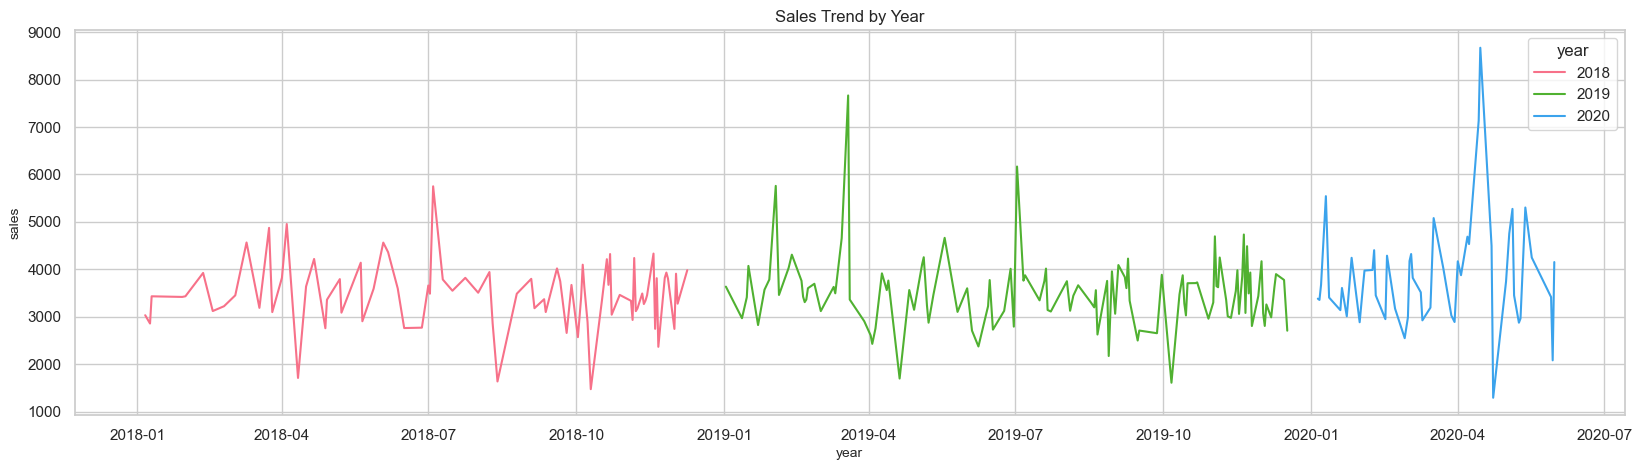

In [28]:
# Sales trend by Year
plt.figure(figsize=(20,5))
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=auto_sales, x="orderdate", y="sales", ci=None, hue="year",palette=sns.color_palette("husl", len(auto_sales['year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("year", fontsize=10)
plt.ylabel("sales", fontsize=10)
plt.legend(title="year", loc='best')
plt.show()

In [29]:
#dealsize, top10 country, top 10 cities, top10 customers, qty ordered, MSRP, profit?, lineplot, scatter, pairplot, plotly, new customer

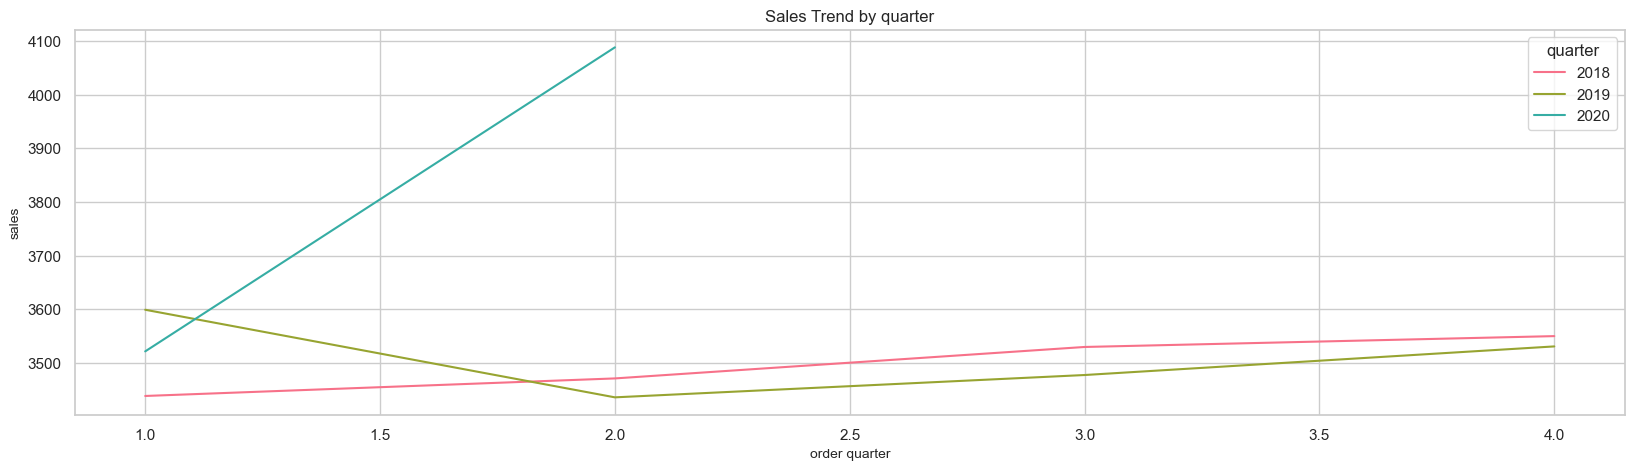

In [30]:
# Sales trend by Quarter
plt.figure(figsize=(20,5))
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=auto_sales, x="quarter", y="sales", ci=None, hue="year",palette=sns.color_palette("husl", len(auto_sales['quarter'].unique())))
plt.title("Sales Trend by quarter")
plt.xlabel("order quarter", fontsize=10)
plt.ylabel("sales", fontsize=10)
plt.legend(title="quarter", loc='best')
plt.show()

In [31]:
#we can see from the line graph that the line is not continuous in december

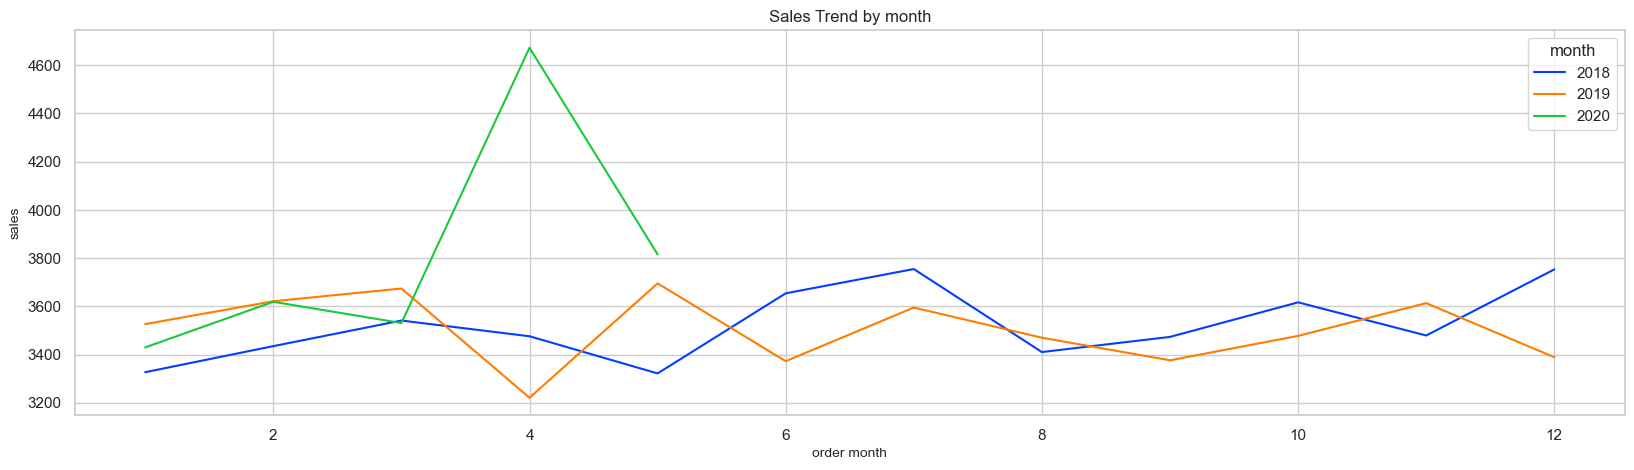

In [32]:
# Sales trend by Month
plt.figure(figsize=(20,5))
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=auto_sales, x="month", y="sales", ci=None, hue="year",palette=sns.color_palette("bright", len(auto_sales['month'].unique())))
plt.title("Sales Trend by month")
plt.xlabel("order month", fontsize=10)
plt.ylabel("sales", fontsize=10)
plt.legend(title="month", loc='best')
plt.show()

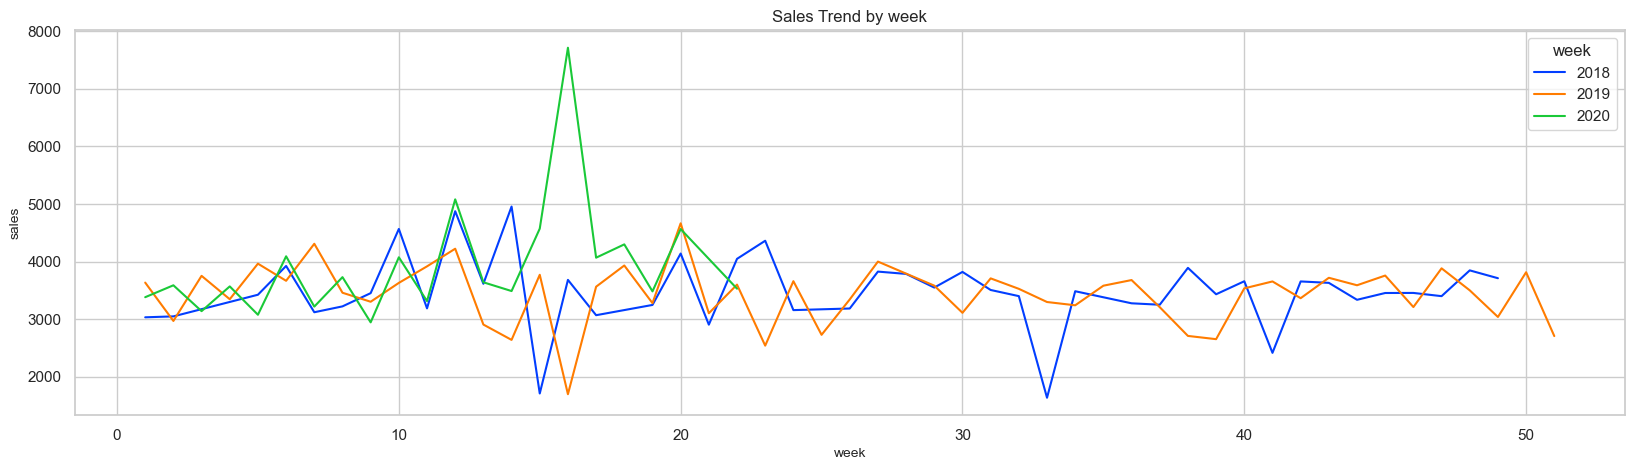

In [33]:
# Sales trend by Month
plt.figure(figsize=(20,5))
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=auto_sales, x="week", y="sales", ci=None, hue="year",palette=sns.color_palette("bright", len(auto_sales['week'].unique())))
plt.title("Sales Trend by week")
plt.xlabel("week", fontsize=10)
plt.ylabel("sales", fontsize=10)
plt.legend(title="week", loc='best')
plt.show()

### After analysing the above line graphs, it can be said that
#### 1. There are no orders after May 2020
#### 2. The sales are the Maximum in 1st quarter of 2020 than any other quarter in 3 years
#### 3. There is very small but almost constant rise in sales for year 2019
#### 4. It can be further anaysed that the sales is negligible in December 2018

In [35]:

#Finding price each for different productlines and their msrp

In [36]:
MSRP = auto_sales.pivot_table(index='productline', values=['msrp','priceeach'], aggfunc='sum')
MSRP

,msrp,priceeach
productline,,
Classic Cars,113639,109320.70
Motorcycles,30244,31227.11
Planes,27046,27517.42
Ships,19770,20278.93
Trains,5620,6476.37
Trucks and Buses,30214,30781.77
Vintage Cars,50067,52116.52


In [37]:
#analysing top10 country, top 10 cities, top10 customers
#for this we needs countries with maximum sales

In [38]:
top10country = auto_sales.groupby('country')['sales'].sum()
top10country = top10country.sort_values(ascending=False).head(10)
top10country

country
USA          3355575.69
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: sales, dtype: float64

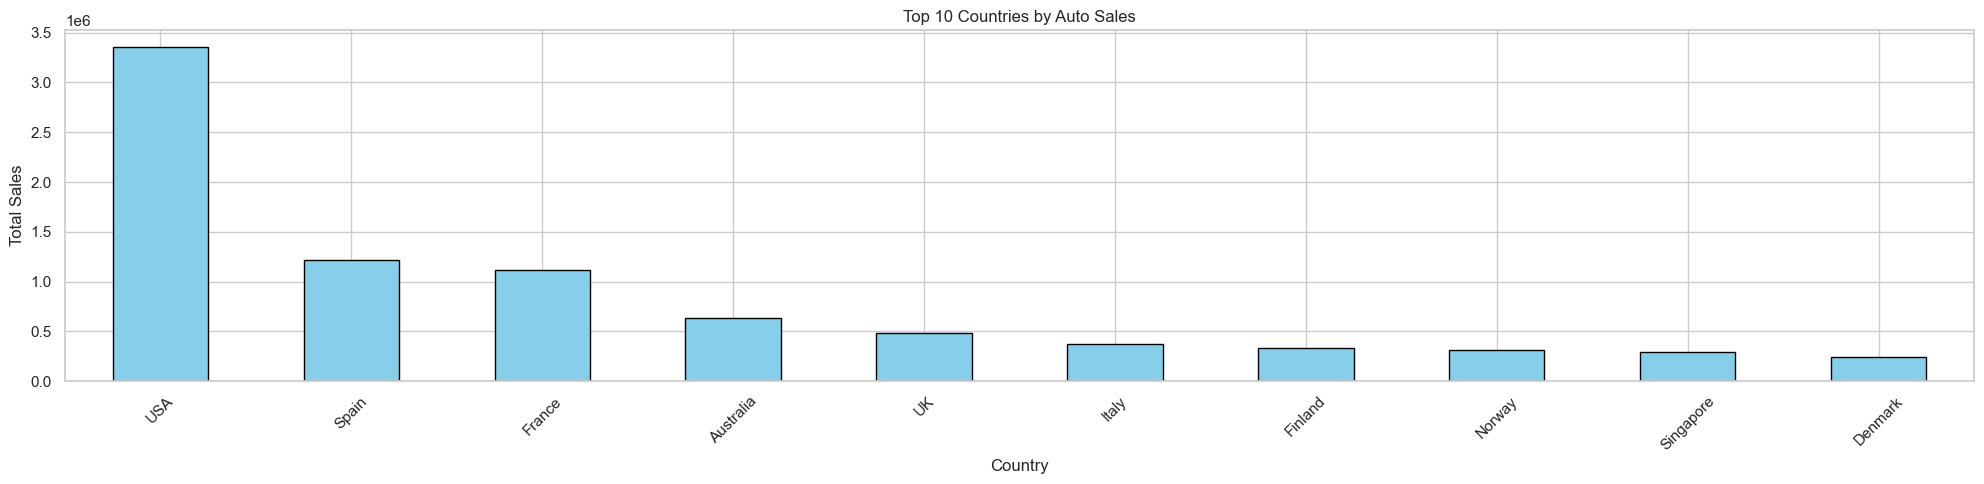

In [181]:
top10country.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries by Auto Sales')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

In [40]:
top10city = auto_sales.groupby('city')['sales'].sum()
top10city = top10city.sort_values(ascending=False).head(10)
top10city

city
Madrid         1082551.44
San Rafael      654858.06
NYC             560787.77
Singapore       288488.41
Paris           268944.68
New Bedford     207874.86
Nantes          204304.86
Melbourne       200995.41
Brickhaven      165255.20
San Jose        160010.27
Name: sales, dtype: float64

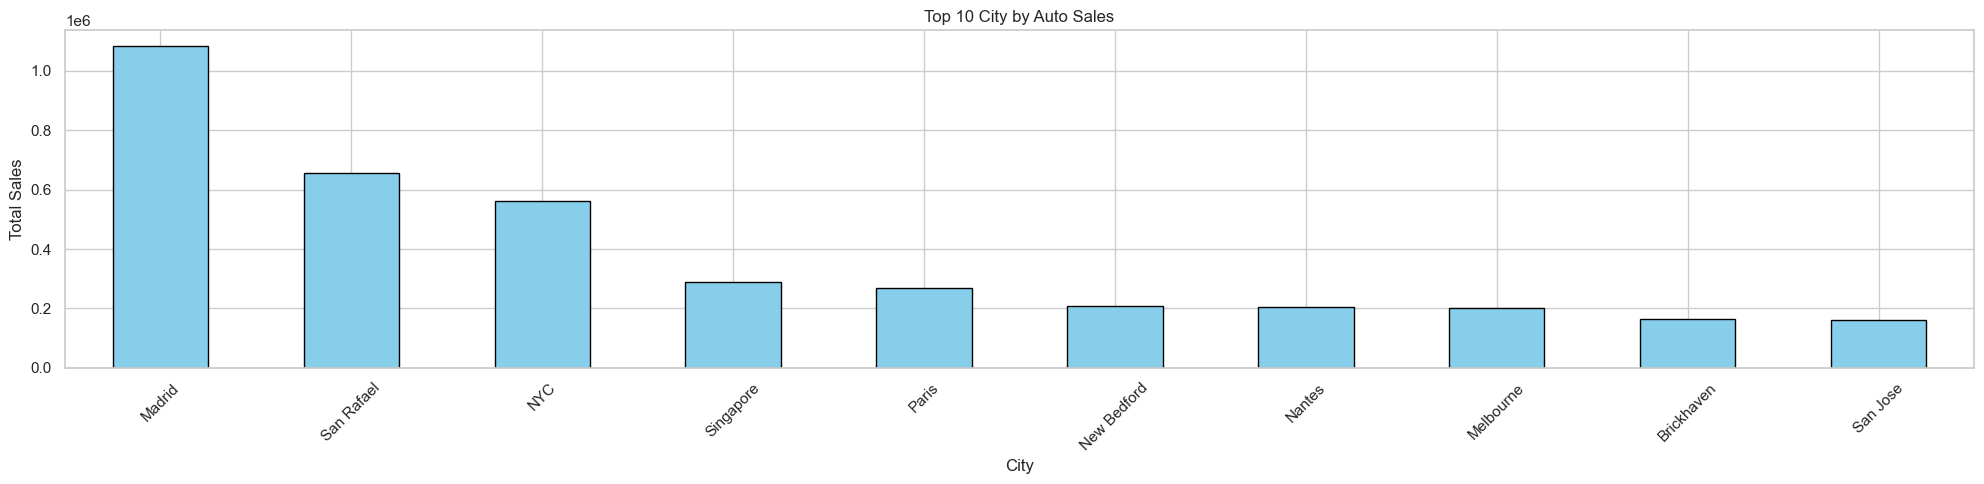

In [41]:
top10city.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top 10 City by Auto Sales')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

In [42]:
top10customer = auto_sales.groupby('customername')['sales'].sum()
top10customer = top10customer.sort_values(ascending=False).head(10)
top10customer

customername
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: sales, dtype: float64

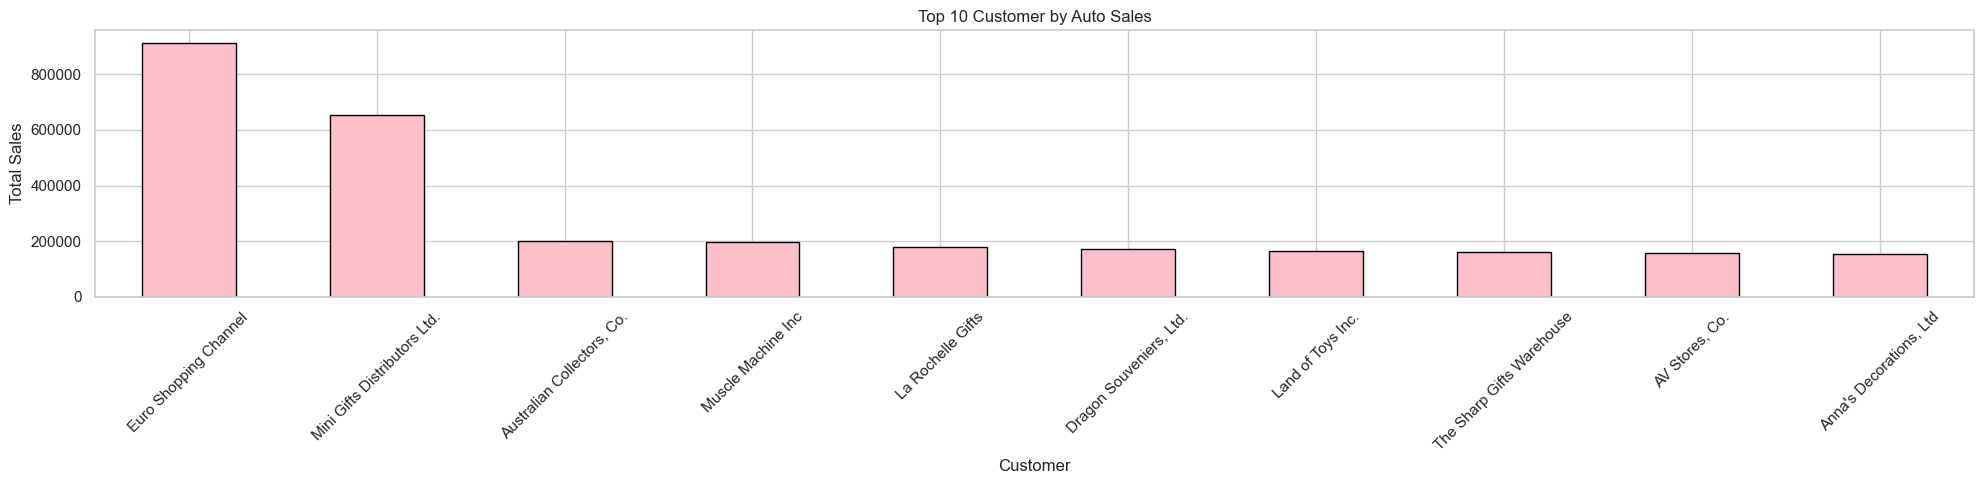

In [43]:
top10customer.plot(kind='bar', color='pink', edgecolor='black')

# Adding labels and title
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top 10 Customer by Auto Sales')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

### From the above barcharts, we can see the top 10 countries, top 10 cities and top 10 customers based on sales

In [45]:
auto_sales['dealsize'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [46]:
auto_sales['customername'].unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Technics Stores Inc.',
       'Daedalus Designs Imports', 'Herkku Gifts', 'Auto Canal Petit',
       'Australian Collectors, Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.', 'La Rochelle Gifts',
       "Marta's Replicas Co.", 'Toys of Finland, Co.',
       'Baane Mini Imports', 'Diecast Classics Inc.',
       'Salzburg Collectables', 'Souveniers And Things Co.',
       'FunGiftIdeas.com', 'UK Collectables, Ltd.',
       'Euro Shopping Channel', 'Volvo Model Replicas, Co',
       'Corrida Auto Replicas, Ltd', 'Dragon Souveniers, Ltd.',
       'Classic Legends Inc.', 'Australian Gift Network, Co',
       'Classic Gift Ideas, Inc', 'Saveley & Henriot, Co.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Tokyo Collectables, Ltd', 'Amica Models & Co.',
       'Scandinavian Gift

In [47]:
top10customer.index

Index(['Euro Shopping Channel', 'Mini Gifts Distributors Ltd.',
       'Australian Collectors, Co.', 'Muscle Machine Inc', 'La Rochelle Gifts',
       'Dragon Souveniers, Ltd.', 'Land of Toys Inc.',
       'The Sharp Gifts Warehouse', 'AV Stores, Co.',
       'Anna's Decorations, Ltd'],
      dtype='object', name='customername')

In [48]:
top10customer = auto_sales.groupby('customername')['sales'].sum()
top10customer = top10customer.sort_values(ascending=False).head(10)
top10_customer = auto_sales[auto_sales['customername'].isin(top10customer.index)]
top10_customer

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,...,city,postalcode,country,contactlastname,contactfirstname,dealsize,year,month,week,quarter
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,NYC,10022,USA,Yu,Kwai,Small,2018,2,8,1
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,...,Melbourne,3004,Australia,Ferguson,Peter,Medium,2019,2,8,1
12,10275,45,92.83,1,4177.35,2019-07-23,326,Shipped,Motorcycles,95,...,Nantes,44000,France,Labrune,Janine,Medium,2019,7,30,3
17,10329,42,104.67,1,4396.14,2019-11-15,216,Shipped,Motorcycles,95,...,NYC,10022,USA,Yu,Kwai,Medium,2019,11,46,4
20,10375,21,34.91,12,733.11,2020-02-03,139,Shipped,Motorcycles,95,...,Nantes,44000,France,Labrune,Janine,Small,2020,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,10248,23,65.52,9,1506.96,2019-05-07,3124,Cancelled,Ships,54,...,NYC,10022,USA,Yu,Kwai,Small,2019,5,19,2
2738,10306,35,59.51,6,2082.85,2019-10-14,2969,Shipped,Ships,54,...,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small,2019,10,42,4
2739,10315,40,55.69,5,2227.60,2019-10-29,2955,Shipped,Ships,54,...,Nantes,44000,France,Labrune,Janine,Small,2019,10,44,4
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,...,Madrid,28034,Spain,Freyre,Diego,Small,2019,12,49,4


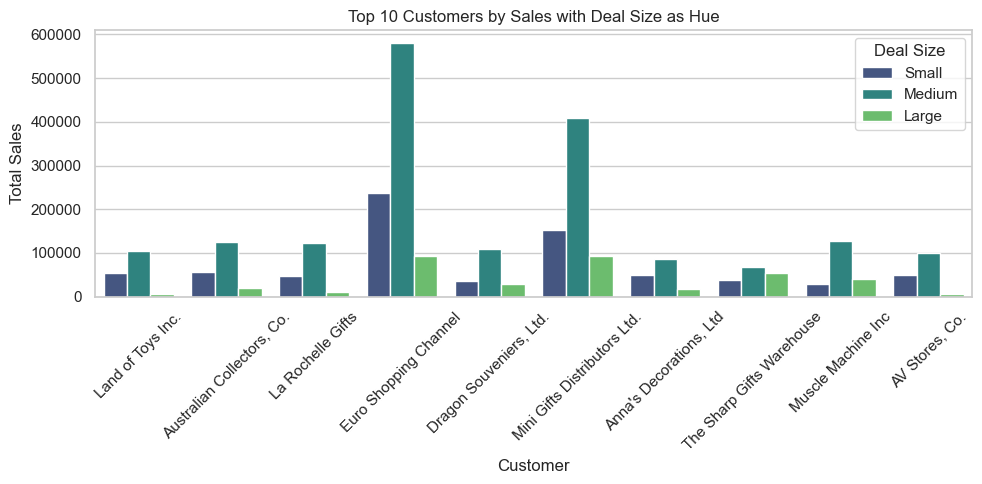

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=top10_customer, x='customername', y='sales', hue='dealsize', errorbar=None, estimator='sum', palette='viridis')

# Add labels and title
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Sales with Deal Size as Hue')
plt.xticks(rotation=45)
plt.legend(title='Deal Size')
plt.tight_layout()
plt.show()

### After analysing the above graphs, we found that top 10 customers prefer medium deal, then small deal, and large deals are fewer in number.

In [51]:
#dealsize, top10 country, top 10 cities, top10 customers, qty ordered, MSRP, profit?, lineplot, scatter, pairplot, plotly, new customer

In [52]:
auto_sales['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [53]:
auto_sales.groupby(['productline','status'])['status'].count()

productline       status    
Classic Cars      Cancelled      16
                  Disputed        3
                  In Process     14
                  On Hold        12
                  Resolved        8
                  Shipped       896
Motorcycles       Disputed        6
                  On Hold         1
                  Shipped       306
Planes            Cancelled      12
                  Disputed        2
                  On Hold         9
                  Resolved       12
                  Shipped       269
Ships             Cancelled      18
                  Disputed        1
                  On Hold         8
                  Resolved       12
                  Shipped       191
Trains            Cancelled       1
                  On Hold         1
                  Shipped        75
Trucks and Buses  In Process     11
                  On Hold         4
                  Resolved        5
                  Shipped       275
Vintage Cars      Cancelled      13

In [54]:
statuspivot = auto_sales.pivot_table(index='productline', columns='status', aggfunc='size')
statuspivot

status,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
productline,,,,,,
Classic Cars,16.0,3.0,14.0,12.0,8.0,896.0
Motorcycles,NaN,6.0,NaN,1.0,NaN,306.0
Planes,12.0,2.0,NaN,9.0,12.0,269.0
Ships,18.0,1.0,NaN,8.0,12.0,191.0
Trains,1.0,NaN,NaN,1.0,NaN,75.0
Trucks and Buses,NaN,NaN,11.0,4.0,5.0,275.0
Vintage Cars,13.0,2.0,16.0,9.0,10.0,529.0


<Axes: xlabel='status', ylabel='productline'>

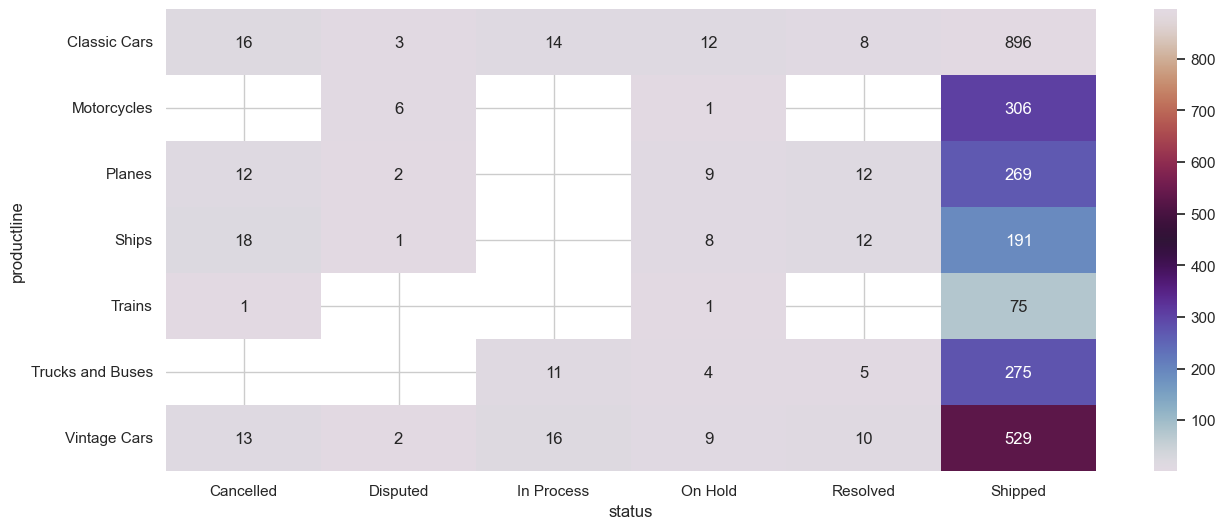

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(statuspivot, annot=True, cmap='twilight', fmt='g')

### As per the above analysis most of the products gets delivered, very less cancelled ,
### on hold or disputed so we can say that there is no problem in regards to delivery of the goods


# Finding Top 10 correlations with respect to Sales

In [142]:
def top10corr(auto_sales):
    #including only numerical columns
    numeric_auto = auto_sales.select_dtypes(include = [np.number])

    corr_matrix = numeric_auto.corr()
    sales_corr = corr_matrix['sales']
    sales_corr = sales_corr.sort_values(ascending=False)[sales_corr<1]
    return sales_corr

auto_sales_corr = top10corr(auto_sales)
auto_sales_corr

priceeach               0.808287
msrp                    0.634849
quantityordered         0.553359
ordernumber             0.037289
year                    0.033604
quarter                -0.007119
month                  -0.010200
week                   -0.012973
orderlinenumber        -0.057414
days_since_lastorder   -0.334274
Name: sales, dtype: float64

<Axes: ylabel='sales'>

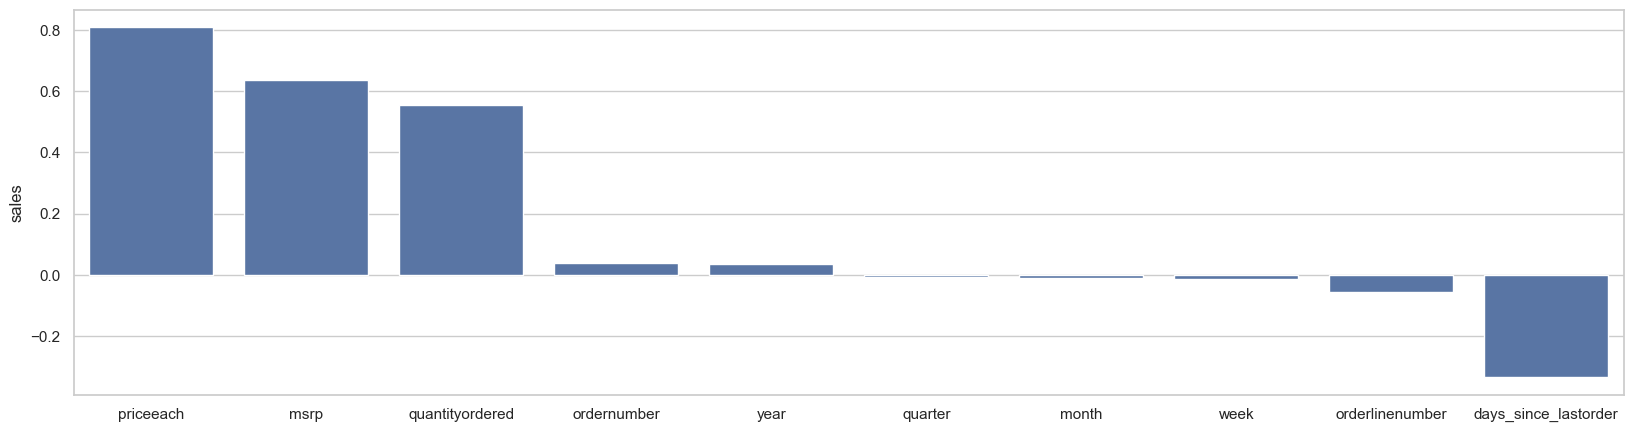

In [150]:
sns.barplot(auto_sales_corr)

# Conclusion

In [153]:
### After analysing the data, the following points can be concluded:
### 1. Classic cars are the most popular product line among customers and have the maximum sales
### 2. Trains are found to be least preferred with the lowest sales
### 3. Among all the countries, the USA is the top country with the highest sales.
### 4. Among all the cities, Madrid is the top city with the highest sales.
### 5. It was also found that the Euro shopping channel is the top customer
### 6. It is noteworthy that most of the customers prefer medium deals, followed by small deal size and large deal size.
### 7. After analysing the yearly sales, it can be said that sales were increasing every year starting from 2018 until April 2020.
### 8. In the quarterly analysis of sales, it was found that
### 9. There are no orders after May 2020
### 10. The sales are the Maximum in 1st quarter of 2020 than any other quarter in 3 years
### 11. There is very small but almost constant rise in sales for year 2019
### 12. It can be further anaysed that the sales is negligible in December 2018